# 5.2 - AB Testing Bayesiano


### Conjugado a priori

https://en.wikipedia.org/wiki/Conjugate_prior

https://en.wikipedia.org/wiki/Beta_distribution

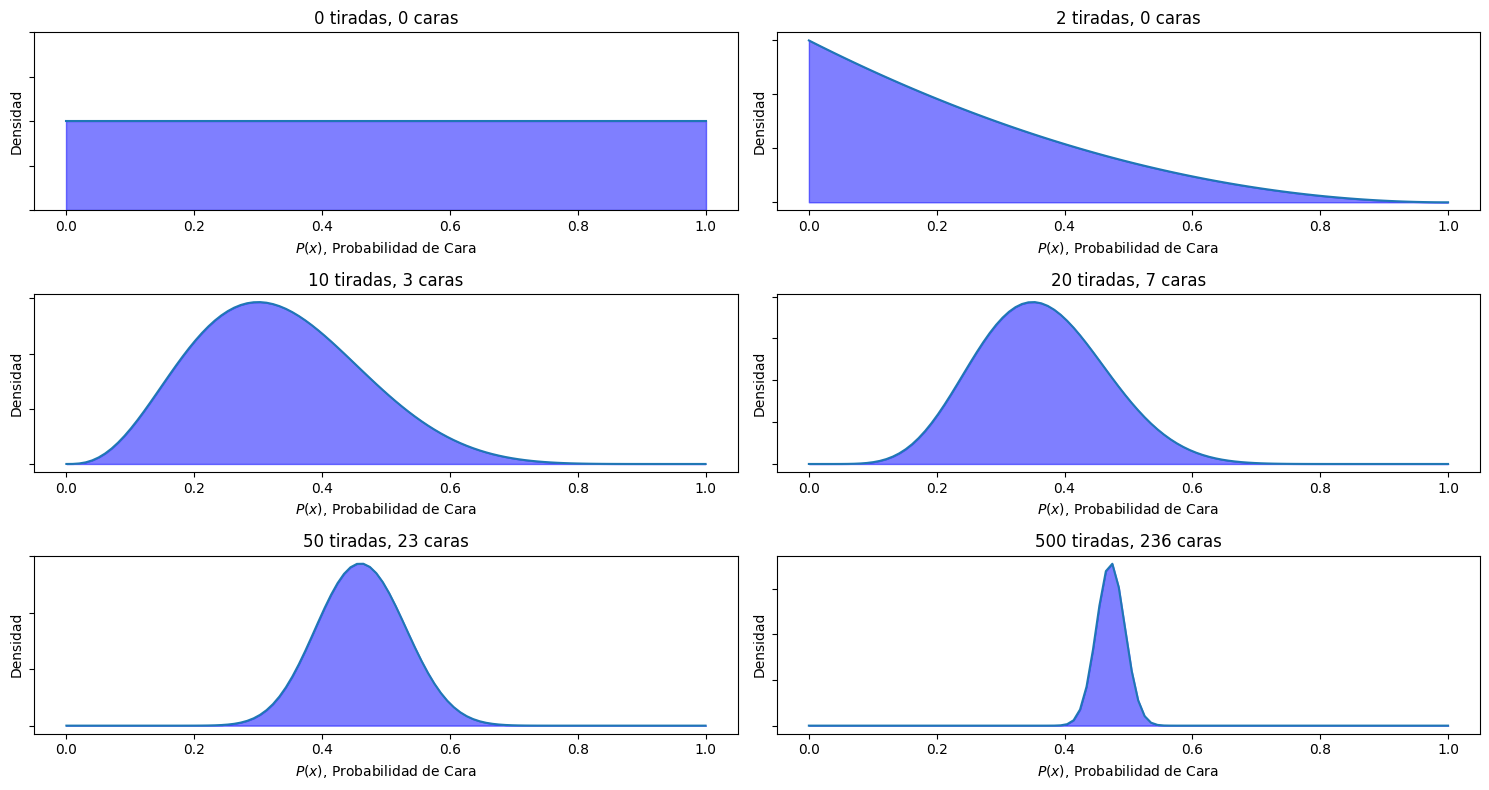

In [1]:
# tiros_de_moneda.py  (modelo beta-binomial)

import warnings
warnings.simplefilter('ignore')


import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta               


tiradas=[0,2,10,20,50,500]    # lista del numero de intentos (experimentos de Bernoulli)
  
datos=bernoulli.rvs(0.5,size=tiradas[-1])   # se tiran 500 veces la moneda, 0-cruz, 1-cara (B(p,n))

x=np.linspace(0,1,100)  # espaciado lineal entre 0 y 1, 100 puntos, se discretiza el eje x


for i,N in enumerate(tiradas):  # se actualiza la informacion respecto al nº de tiradas, modelo beta-binomial (i actualizaciones , N tiradas)

    caras=datos[:N].sum()                              # suma las caras que van saliendo
    ax=plt.subplot(int(len(tiradas)/2), 2, i+1)             # se crea un plot cada vez que se actualiza
    
    ax.set_title("%s tiradas, %s caras" % (N, caras))  # titulo  
    plt.xlabel("$P(x)$, Probabilidad de Cara")         # etiqueta x
    plt.ylabel("Densidad")                             # etiqueta y
    
    if i == 0:                                         # limite del eje y en el primer plot (0 tiradas)
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)      # quita los numeros del eje y
    
    y=beta.pdf(x, 1+caras, 1+N-caras)                  # se crea y se dibuja la distribucion beta que representa... (Beta(x,a,b))
    plt.plot(x,y)                                      # ... la creencia a posteriori de la perfeccion de la moneda (beta-binomial, bayesiano)
    plt.fill_between(x, 0, y, color='b', alpha=0.5)    # se rellena de color la distribucion 


plt.tight_layout()  # se expande el plot
plt.show();         # se plotea

![bayesian_ab_test](images/bayesian_ab_test.gif)

### what if...? 

¿cual es la prob de que el test sea superior a 0.003 (CR)?

¿cual es la prob de fracasar si me cambio al test?